In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/Airbnb_Open_Data.csv", engine="python", on_bad_lines="skip")




In [6]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
print(df.shape)

(28927, 26)


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28927 entries, 0 to 28926
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              28927 non-null  int64  
 1   NAME                            28835 non-null  object 
 2   host id                         28927 non-null  int64  
 3   host_identity_verified          28769 non-null  object 
 4   host name                       28704 non-null  object 
 5   neighbourhood group             28900 non-null  object 
 6   neighbourhood                   28911 non-null  object 
 7   lat                             28919 non-null  float64
 8   long                            28919 non-null  float64
 9   country                         28840 non-null  object 
 10  country code                    28848 non-null  object 
 11  instant_bookable                28848 non-null  object 
 12  cancellation_policy             

In [9]:
print(df.describe(include="all"))


                  id            NAME       host id host_identity_verified  \
count   2.892700e+04           28835  2.892700e+04                  28769   
unique           NaN           28372           NaN                      2   
top              NaN  Hillside Hotel           NaN            unconfirmed   
freq             NaN              18           NaN                  14478   
mean    8.989251e+06             NaN  4.931574e+10                    NaN   
std     4.612064e+06             NaN  2.847959e+10                    NaN   
min     1.001254e+06             NaN  1.303496e+08                    NaN   
25%     4.995294e+06             NaN  2.463608e+10                    NaN   
50%     8.989251e+06             NaN  4.914803e+10                    NaN   
75%     1.298321e+07             NaN  7.400083e+10                    NaN   
max     1.697717e+07             NaN  9.876097e+10                    NaN   

       host name neighbourhood group neighbourhood           lat  \
count  

In [10]:
print(df.isnull().sum())

id                                    0
NAME                                 92
host id                               0
host_identity_verified              158
host name                           223
neighbourhood group                  27
neighbourhood                        16
lat                                   8
long                                  8
country                              87
country code                         79
instant_bookable                     79
cancellation_policy                  50
room type                             0
Construction year                   146
price                                95
service fee                          62
minimum nights                      178
number of reviews                    34
last review                        4800
reviews per month                  4786
review rate number                  108
calculated host listings count       83
availability 365                    178
house_rules                        9602


In [11]:
#remove duplicates
df.drop_duplicates(inplace=True)


In [12]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [13]:
# Convert id columns to string
df["id"] = df["id"].astype(str)
df["host_id"] = df["host_id"].astype(str)

# Clean price & service_fee columns
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)
df["service_fee"] = df["service_fee"].replace('[\$,]', '', regex=True).astype(float)

# Convert last_review to datetime
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3540647395.py:6: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-3540647395.py:7: SyntaxWarning: invalid escape sequence '\$'
  df["service_fee"] = df["service_fee"].replace('[\$,]', '', regex=True).astype(float)


In [14]:
df.isnull().sum()


,0
id,0
name,92
host_id,0
host_identity_verified,158
host_name,223
neighbourhood_group,27
neighbourhood,16
lat,8
long,8
country,87


In [15]:
# Fill numerical NaNs with 0
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols] = df[num_cols].fillna(0)

# Fill categorical NaNs with "Unknown"
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")


In [16]:
# Cap minimum_nights at 365
df.loc[df["minimum_nights"] > 365, "minimum_nights"] = 365

# Cap price (e.g., >1000 is unrealistic for many cities)
df.loc[df["price"] > 1000, "price"] = 1000


In [17]:
# Availability as binary
df["is_available"] = df["availability_365"].apply(lambda x: 1 if x > 0 else 0)

# Extract year and month of last review
df["last_review_year"] = df["last_review"].dt.year
df["last_review_month"] = df["last_review"].dt.month


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28927 entries, 0 to 28926
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              28927 non-null  object        
 1   name                            28927 non-null  object        
 2   host_id                         28927 non-null  object        
 3   host_identity_verified          28927 non-null  object        
 4   host_name                       28927 non-null  object        
 5   neighbourhood_group             28927 non-null  object        
 6   neighbourhood                   28927 non-null  object        
 7   lat                             28927 non-null  float64       
 8   long                            28927 non-null  float64       
 9   country                         28927 non-null  object        
 10  country_code                    28927 non-null  object        
 11  in

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

Room type: ['Private room' 'Entire home/apt' 'Shared room']


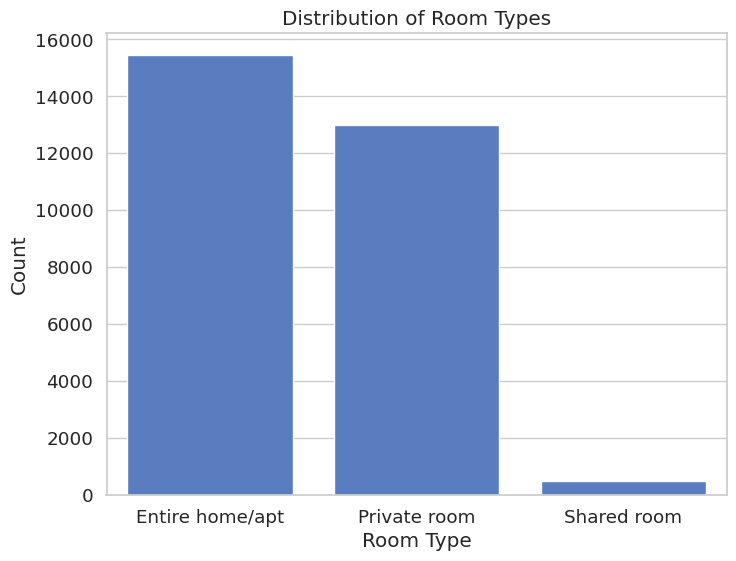

In [22]:
# 1. Different property types in the dataset
property_types = df['room_type'].unique()
print("Room type:", property_types)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="room_type", order=df["room_type"].value_counts().index)
plt.title("Distribution of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

Highest listings neighborhood group: Manhattan


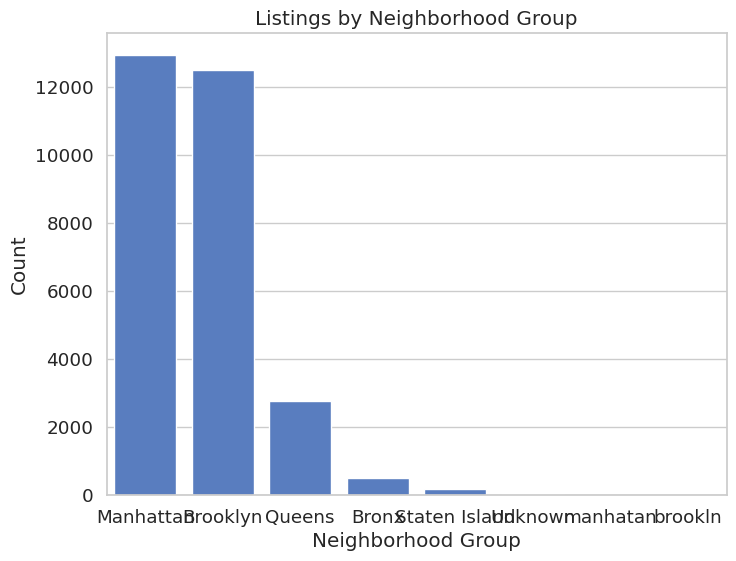

In [23]:
# 2. Neighborhood group with the highest number of listings
neighborhood_counts = df['neighbourhood_group'].value_counts()
highest_count_group = neighborhood_counts.idxmax()
print("Highest listings neighborhood group:", highest_count_group)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="neighbourhood_group", order=df["neighbourhood_group"].value_counts().index)
plt.title("Listings by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-921681855.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neigh.values, y=top_neigh.index, palette="viridis")


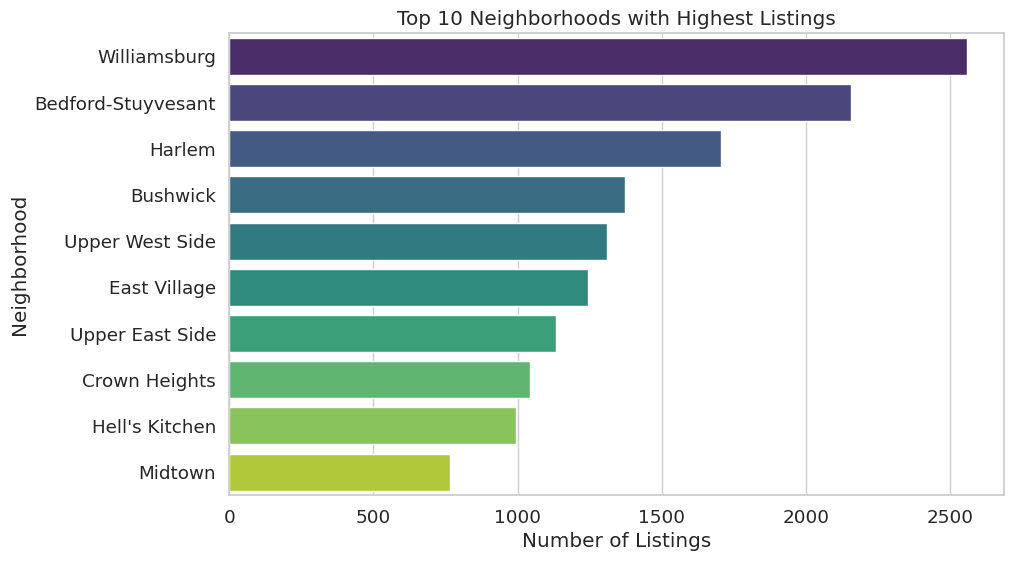

In [25]:
# 3. Neighborhood group with highest average prices
plt.figure(figsize=(10,6))
top_neigh = df["neighbourhood"].value_counts().head(10)
sns.barplot(x=top_neigh.values, y=top_neigh.index, palette="viridis")
plt.title("Top 10 Neighborhoods with Highest Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighborhood")
plt.show()

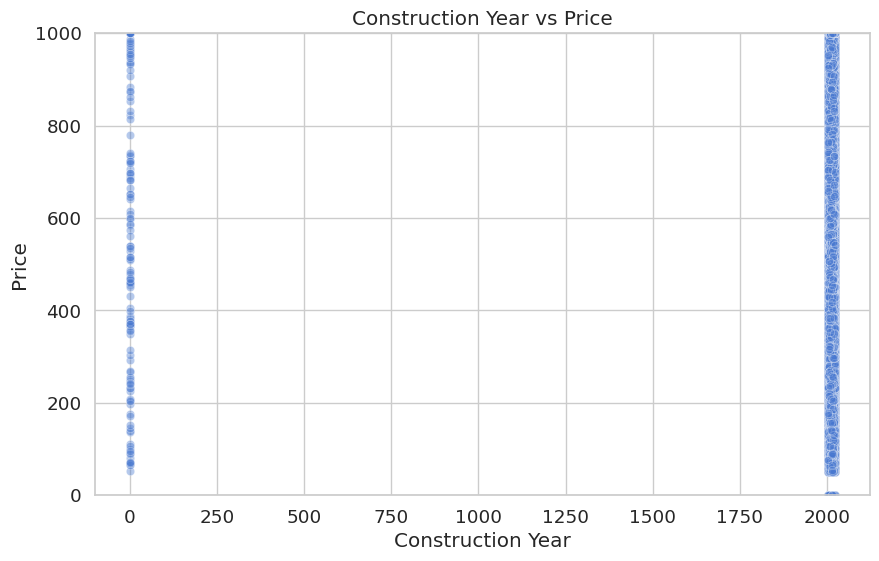

In [27]:
# 4. Relationship between construction year and price (if available)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="construction_year", y="price", alpha=0.4)
plt.title("Construction Year vs Price")
plt.xlabel("Construction Year")
plt.ylabel("Price")
plt.ylim(0,1000)   # to remove outliers effect
plt.show()

/tmp/ipython-input-343499201.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.values, y=top_hosts.index, palette="magma")


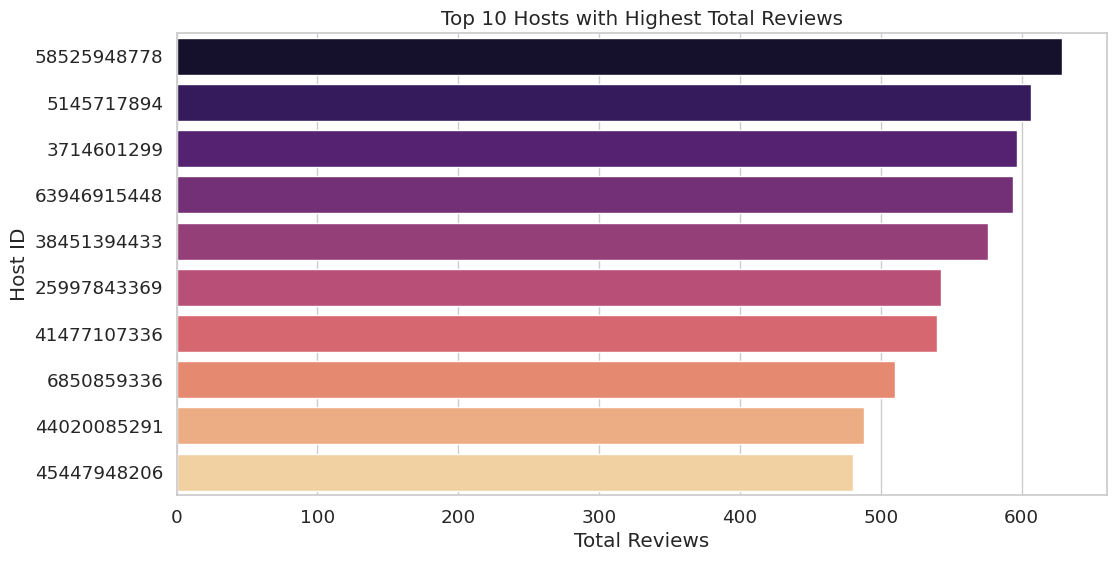

In [29]:
# 5. Top 10 hosts by listing count
plt.figure(figsize=(12,6))
top_hosts = df.groupby("host_id")["number_of_reviews"].sum().nlargest(10)
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette="magma")
plt.title("Top 10 Hosts with Highest Total Reviews")
plt.xlabel("Total Reviews")
plt.ylabel("Host ID")
plt.show()

/tmp/ipython-input-1824563089.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="host_type", y="review_rate_number", palette="Set2")


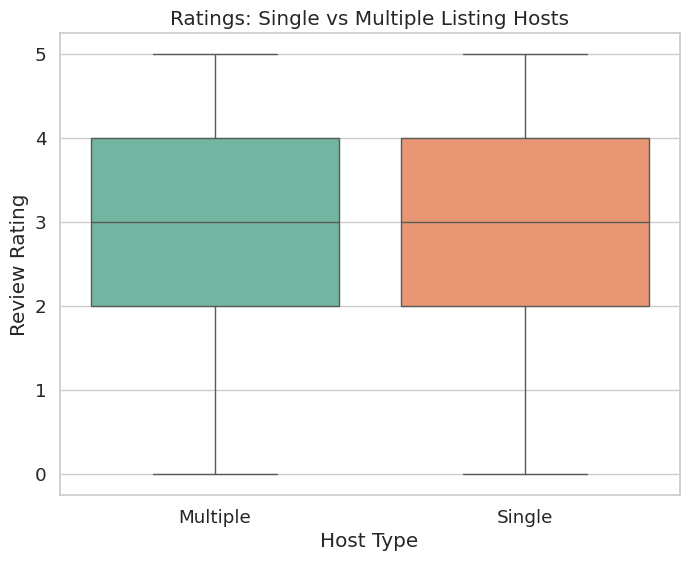

In [30]:
# 6. Are hosts with verified identities more likely to receive positive reviews?
df["host_type"] = df["calculated_host_listings_count"].apply(lambda x: "Multiple" if x > 1 else "Single")

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="host_type", y="review_rate_number", palette="Set2")
plt.title("Ratings: Single vs Multiple Listing Hosts")
plt.xlabel("Host Type")
plt.ylabel("Review Rating")
plt.show()

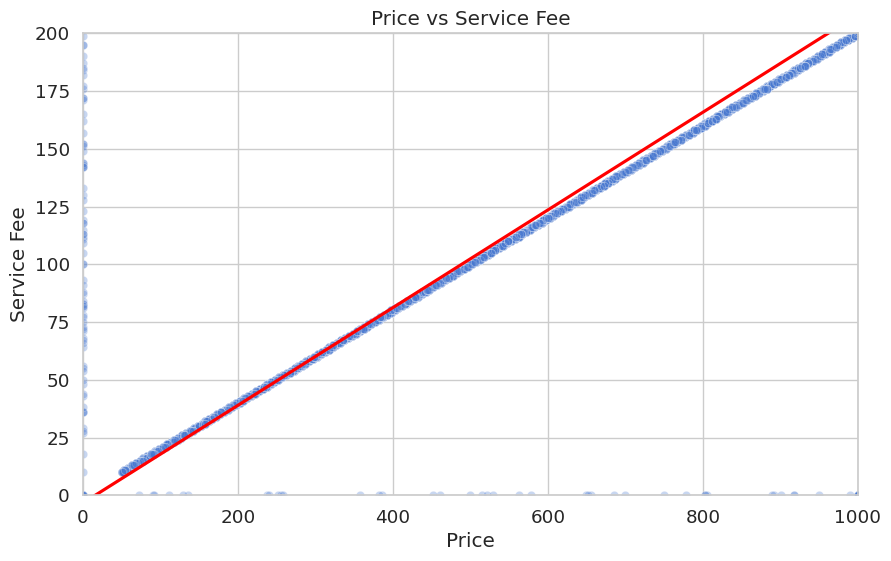

In [31]:
# 7. Correlation between price and service fee (if available)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="price", y="service_fee", alpha=0.3)
sns.regplot(data=df, x="price", y="service_fee", scatter=False, color="red")
plt.title("Price vs Service Fee")
plt.xlabel("Price")
plt.ylabel("Service Fee")
plt.xlim(0,1000)
plt.ylim(0,200)
plt.show()

In [35]:
# 8. Average review rate number by neighborhood + room type
avg_review_rate = df.groupby(['neighbourhood', 'room_type'])['reviews_per_month'].mean().reset_index()

# sort by neighborhood
avg_review_rate = avg_review_rate.sort_values(by=['neighbourhood', 'room_type'])

print(avg_review_rate)

    neighbourhood        room_type  reviews_per_month
0        Allerton  Entire home/apt           2.048571
1        Allerton     Private room           0.906154
2        Arrochar  Entire home/apt           0.656000
3        Arrochar     Private room           0.777500
4         Arverne  Entire home/apt           1.192692
..            ...              ...                ...
477      Woodlawn     Private room           0.130000
478      Woodlawn      Shared room           0.110000
479       Woodrow  Entire home/apt           0.000000
480      Woodside  Entire home/apt           2.328621
481      Woodside     Private room           0.840800

[482 rows x 3 columns]


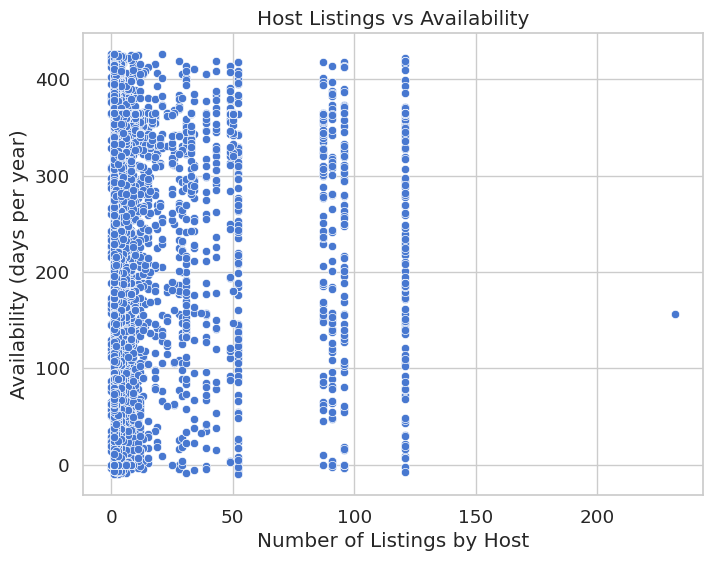

Correlation between host listings and availability: 0.10572673115619455


In [33]:

# 9. Are hosts with more listings more likely to maintain higher availability?
# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='calculated_host_listings_count', y='availability_365')
plt.title('Host Listings vs Availability')
plt.xlabel('Number of Listings by Host')
plt.ylabel('Availability (days per year)')
plt.show()
# Calculate correlation
correlation = df['calculated_host_listings_count'].corr(df['availability_365'])
print(f"Correlation between host listings and availability: {correlation}")